<a href="https://colab.research.google.com/github/ctctmusic/DataAnalyst_Task_Doctor_Engagement_Retention_on_Platform_Finance/blob/main/TechInterview_DataAnalyst_Task_DocPlatform_Engagement_Rentention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA

import pandas as pd

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/Applied AI_allWomen Tech/DocPlanner_Data Task/Data Analyst_Task_BI case study - case study.csv")

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'])

# --- Numeric Summary ---
numeric_summary = df.describe()

# --- Missing Values ---
missing_values = df.isnull().sum()

# --- Categorical Summaries ---
categorical_summary = {
    'country_count': df['country'].nunique(),
    'specialization_count': df['specialization'].nunique(),
    'specialization_types': df['specialization_type'].unique().tolist(),
    'pricing_levels': sorted(df['pricing'].unique().tolist()),
    'status_distribution': df['status'].value_counts(dropna=False)
}

# Print Results
print("=== NUMERIC SUMMARY ===")
print(numeric_summary)

print("\n=== MISSING VALUES ===")
print(missing_values)

print("\n=== CATEGORICAL SUMMARY ===")
for key, value in categorical_summary.items():
    print(f"{key}: {value}")


=== NUMERIC SUMMARY ===
                               month      doctor_id        pricing  \
count                         201851  201851.000000  201851.000000   
mean   2020-05-16 14:32:29.108996096   16232.133331       2.756073   
min              2019-01-01 00:00:00       1.000000       1.000000   
25%              2020-01-01 00:00:00    8078.000000       2.000000   
50%              2020-06-01 00:00:00   16976.000000       2.000000   
75%              2020-11-01 00:00:00   23348.500000       4.000000   
max              2021-02-01 00:00:00   33703.000000       5.000000   
std                              NaN    9329.971951       1.400875   

          permanency       opinions  doctor_appointments  patient_appointments  
count  201851.000000  201851.000000         201851.00000         201851.000000  
mean       10.055070       2.416510              8.59531             13.490317  
min         6.000000       0.000000              0.00000              0.000000  
25%         6.000000 

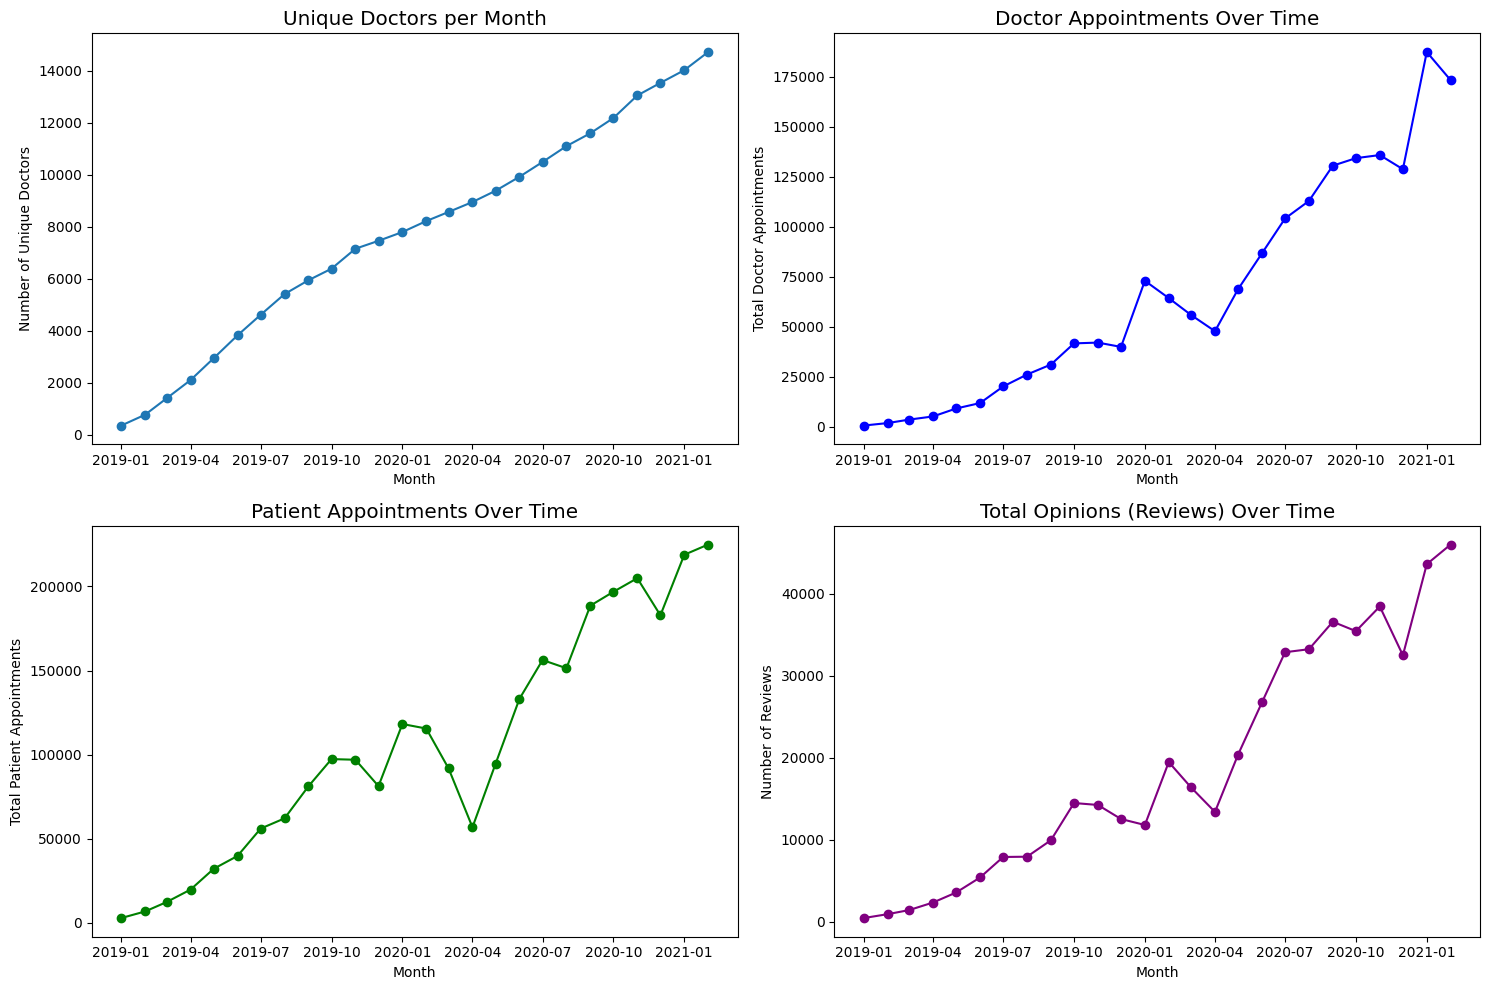

In [ ]:
#time series charts of unique doctors, appointments, reviews over time
import matplotlib.pyplot as plt

# --- Prepare Monthly Summary ---
monthly_summary = df.groupby('month').agg({
    'doctor_id': pd.Series.nunique,  # Unique doctors per month
    'doctor_appointments': 'sum',
    'patient_appointments': 'sum',
    'opinions': 'sum'
}).reset_index().rename(columns={'doctor_id': 'unique_doctors'})

# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.style.use('ggplot')

# Chart 1: Unique Doctors per Month
axs[0, 0].plot(monthly_summary['month'], monthly_summary['unique_doctors'], marker='o')
axs[0, 0].set_title('Unique Doctors per Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Number of Unique Doctors')

# Chart 2: Doctor Appointments Over Time
axs[0, 1].plot(monthly_summary['month'], monthly_summary['doctor_appointments'], color='blue', marker='o')
axs[0, 1].set_title('Doctor Appointments Over Time')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Doctor Appointments')

# Chart 3: Patient Appointments Over Time
axs[1, 0].plot(monthly_summary['month'], monthly_summary['patient_appointments'], color='green', marker='o')
axs[1, 0].set_title('Patient Appointments Over Time')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Total Patient Appointments')

# Chart 4: Opinions (Reviews) Over Time
axs[1, 1].plot(monthly_summary['month'], monthly_summary['opinions'], color='purple', marker='o')
axs[1, 1].set_title('Total Opinions (Reviews) Over Time')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


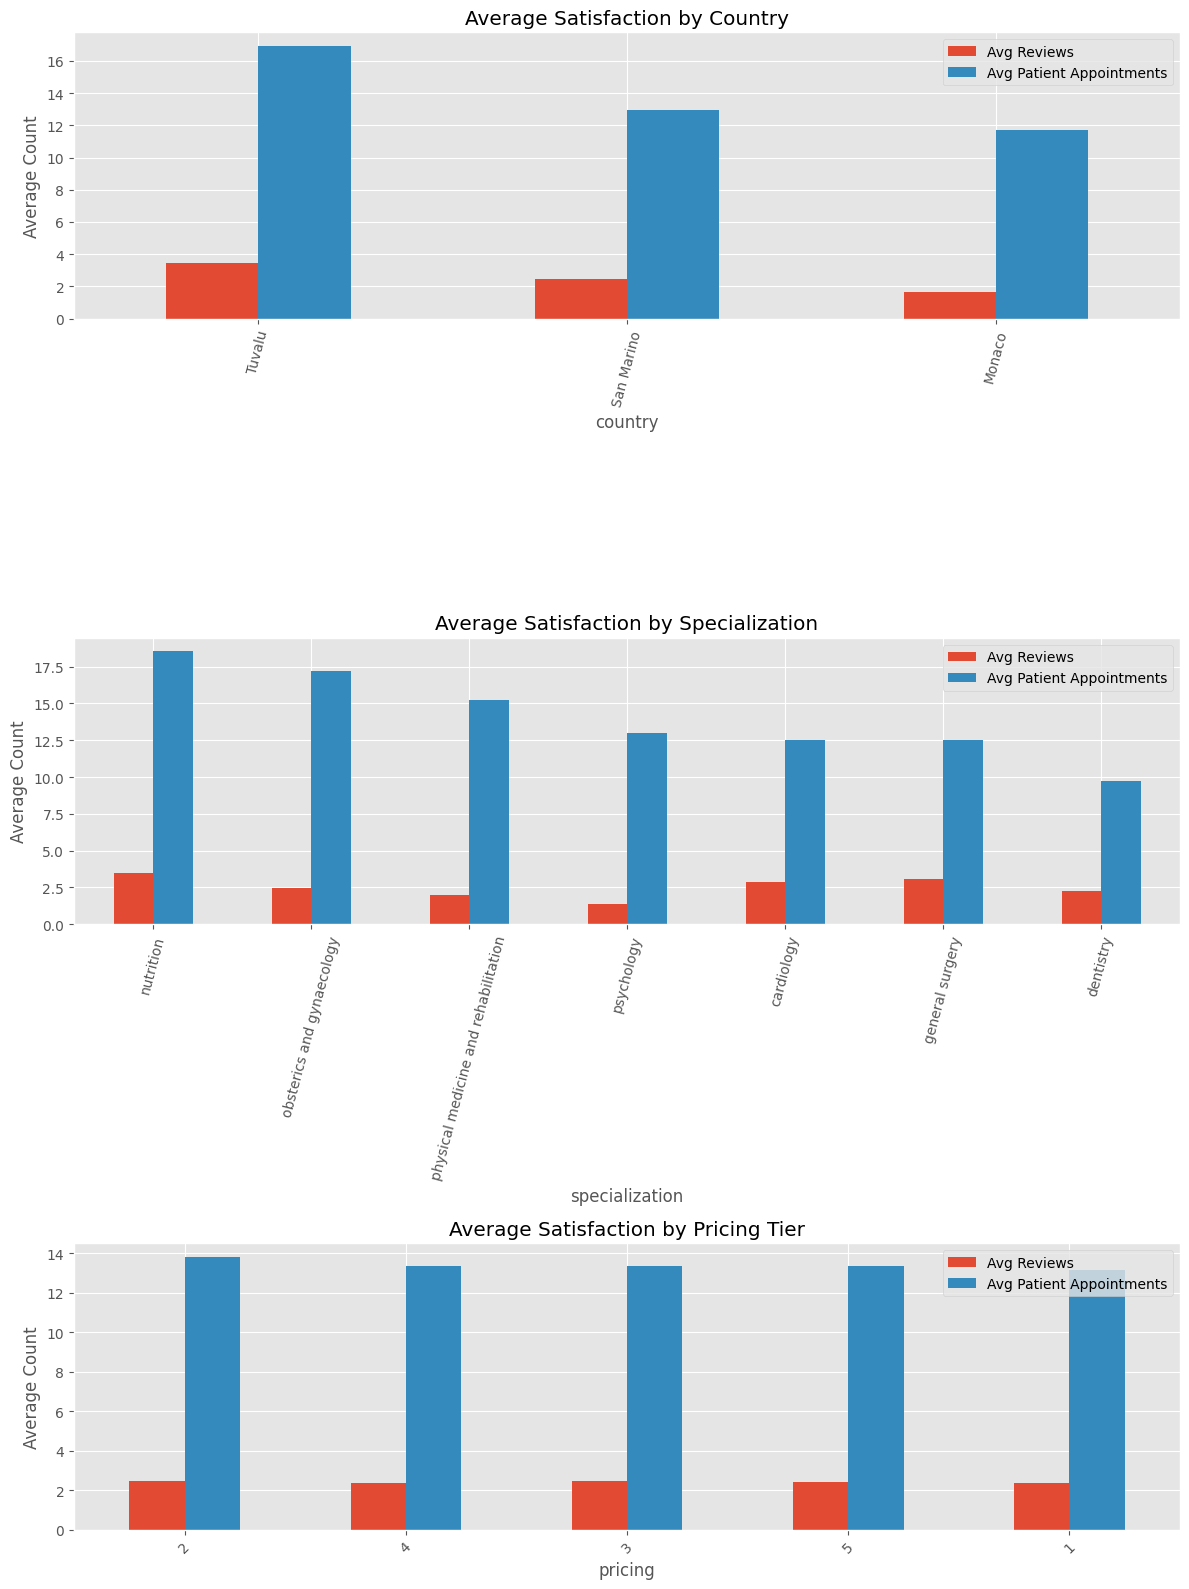

In [ ]:
#Question 1: Who Is Satisfied, and Who Needs More Attention?
#Karen’s Definition of Satisfaction:
#Doctors with enough opinions and user bookings (patient appointments).

# Calculate satisfaction metrics
satisfaction_by_country = df.groupby('country')[['opinions', 'patient_appointments']].mean().sort_values(by='patient_appointments', ascending=False)
satisfaction_by_specialization = df.groupby('specialization')[['opinions', 'patient_appointments']].mean().sort_values(by='patient_appointments', ascending=False)
satisfaction_by_pricing = df.groupby('pricing')[['opinions', 'patient_appointments']].mean().sort_values(by='patient_appointments', ascending=False)

# --- Plotting ---
fig, axs = plt.subplots(3, 1, figsize=(12, 16))
plt.style.use('ggplot')

# Chart 1: By Country
satisfaction_by_country.plot(kind='bar', ax=axs[0])
axs[0].set_title('Average Satisfaction by Country')
axs[0].set_ylabel('Average Count')
axs[0].legend(["Avg Reviews", "Avg Patient Appointments"])
axs[0].tick_params(axis='x', labelrotation=75)
#conclusion: Tuvalu doctors lead in both reviews and patient appointments
#Conclusion: Monaco lags - fewer reviews and bookings → may need more support
##or visibility

# Chart 2: By Specialization
satisfaction_by_specialization.plot(kind='bar', ax=axs[1])
axs[1].set_title('Average Satisfaction by Specialization')
axs[1].set_ylabel('Average Count')
axs[1].legend(["Avg Reviews", "Avg Patient Appointments"])
axs[1].tick_params(axis='x', labelrotation=75)
#Conclusion: nurtion and OB-GYN specialists are top performers
#Conclusion: Dentists have the lowest average bookings - could be a concer
##area for engagement

# Chart 3: By Pricing
satisfaction_by_pricing.plot(kind='bar', ax=axs[2])
axs[2].set_title('Average Satisfaction by Pricing Tier')
axs[2].set_ylabel('Average Count')
axs[2].legend(["Avg Reviews", "Avg Patient Appointments"])
axs[2].tick_params(axis='x', labelrotation=45)
#Conclusion: very little difference across pricing - whether doctors
##despite tier-levels, satisfaction remains stable
#Conclusion: suggests pricing isn't a barrier to patient engagement

plt.tight_layout()
plt.show()


# 2. Compare early vs. new doctors


 Step-by-Step Plan

Define doctor cohorts:

"Early joiners" = First seen in 2019

"New joiners" = First seen in 2020 or later

Assign each doctor a “join month” (their first appearance in the dataset)

Compare engagement metrics:

Average patient_appointments

Average opinions (reviews)


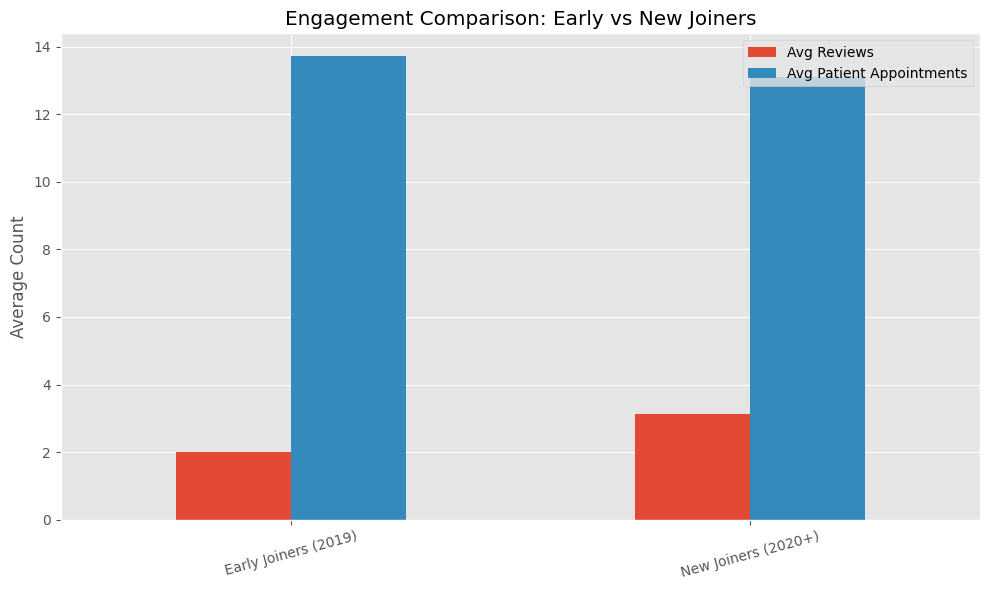

In [ ]:
#Question 2: compare doctors who joined recently, in the last two years, versus earlier doctors

# Get each doctor's join month
first_seen = df.groupby('doctor_id')['month'].min().reset_index().rename(columns={'month': 'join_month'})
df_joined = df.merge(first_seen, on='doctor_id')

# Create cohort: early vs new joiners
df_joined['cohort'] = df_joined['join_month'].dt.year.apply(lambda x: 'early_joiner' if x == 2019 else 'new_joiner')

# Group by cohort
cohort_summary = df_joined.groupby('cohort')[['opinions', 'patient_appointments']].mean()

# Rename index for plotting clarity
cohort_summary_plot = cohort_summary.copy()
cohort_summary_plot.index = ['Early Joiners (2019)', 'New Joiners (2020+)']

# Plot
ax = cohort_summary_plot.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_title('Engagement Comparison: Early vs New Joiners')
ax.set_ylabel('Average Count')
ax.legend(["Avg Reviews", "Avg Patient Appointments"])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#Conclusion:
#New joiners leave more reviews on average (3.13 vs. 2.02) → possibly more engaged or actively asking for feedback.
#Early joiners have slightly more patient appointments, but the difference is small.


# 3. Churning


Karen's Question:
“Are there any signals from the doctors who later terminate the contract?”
“Maybe they behave in a certain way before they leave us?”

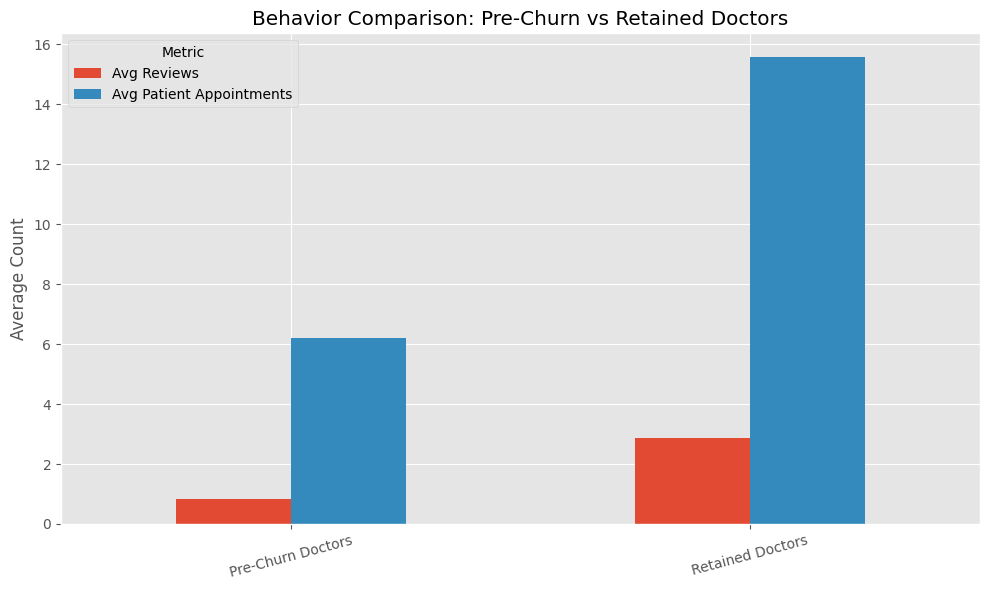

In [ ]:
# Reuse or redefine averages

# Step 1: Identify churned doctors and when they churned
churn_info = df[df['status'] == 'churn'].groupby('doctor_id')['month'].min().reset_index().rename(columns={'month': 'churn_month'})

# Step 2: Merge churn month back into full dataset
df_churn_labeled = df.merge(churn_info, on='doctor_id', how='left')

# Step 3: Pre-churn records (month < churn_month)
pre_churn = df_churn_labeled[
    (df_churn_labeled['churn_month'].notnull()) &
    (df_churn_labeled['month'] < df_churn_labeled['churn_month'])
]

# Step 4: Retained doctors = those with no churn label
retained = df_churn_labeled[df_churn_labeled['churn_month'].isnull()]

# Step 5: Calculate average metrics
pre_churn_avg = pre_churn[['opinions', 'patient_appointments']].mean()
retained_avg = retained[['opinions', 'patient_appointments']].mean()

# Step 6: Create comparison chart
churn_signal_comparison = pd.DataFrame({
    'Pre-Churn Doctors': pre_churn_avg,
    'Retained Doctors': retained_avg
})

# Tidy for plotting
churn_signal_comparison.index = ['Avg Reviews', 'Avg Patient Appointments']
churn_signal_comparison = churn_signal_comparison.T

# Plot
ax = churn_signal_comparison.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_title('Behavior Comparison: Pre-Churn vs Retained Doctors')
ax.set_ylabel('Average Count')
ax.legend(title='Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



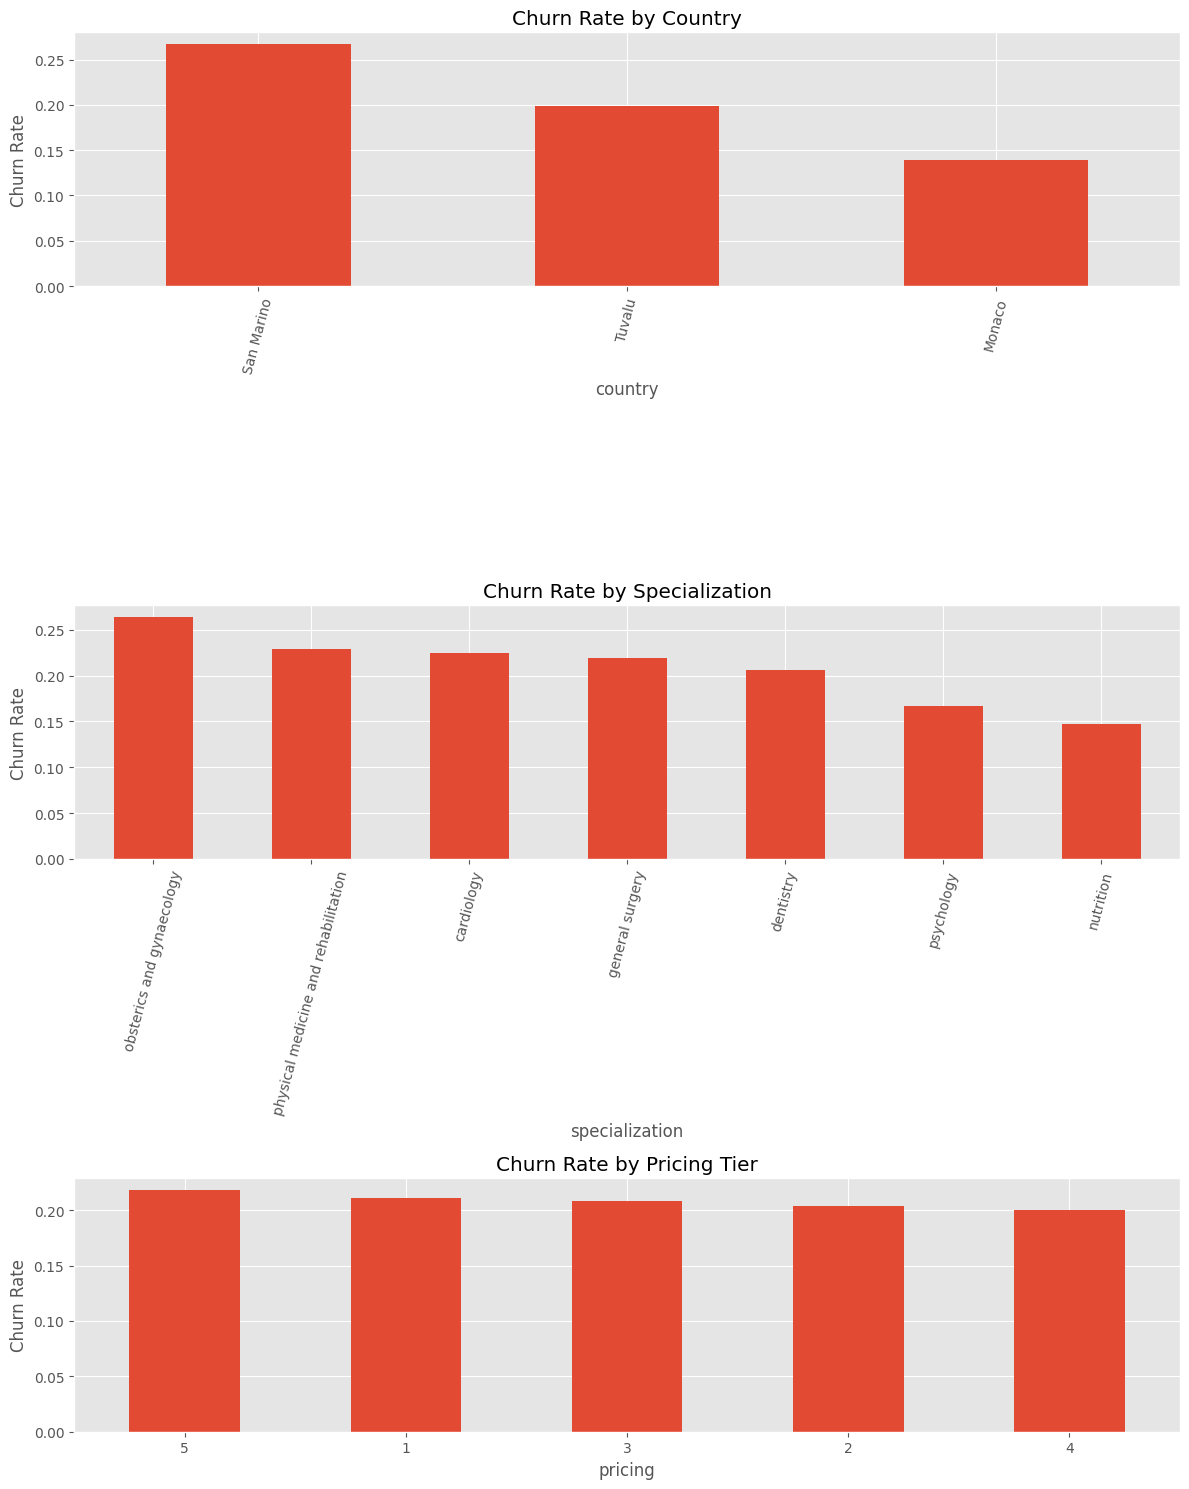

In [ ]:
#Question: groups that churn more often than others

# Step 1: Tag churned doctors
churned_doctors = df[df['status'] == 'churn']['doctor_id'].unique()
df['churned'] = df['doctor_id'].isin(churned_doctors)

# Step 2: Get one row per doctor with group info
doctor_profiles = df.drop_duplicates(subset='doctor_id')[['doctor_id', 'country', 'specialization', 'pricing', 'churned']]

# Step 3: Calculate churn rates by group
churn_rate_by_country = doctor_profiles.groupby('country')['churned'].mean().sort_values(ascending=False)
churn_rate_by_specialization = doctor_profiles.groupby('specialization')['churned'].mean().sort_values(ascending=False)
churn_rate_by_pricing = doctor_profiles.groupby('pricing')['churned'].mean().sort_values(ascending=False)

# Step 4: Plot all 3 charts
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
plt.style.use('ggplot')

# Chart 1: Country
churn_rate_by_country.plot(kind='bar', ax=axs[0])
axs[0].set_title('Churn Rate by Country')
axs[0].set_ylabel('Churn Rate')
axs[0].tick_params(axis='x', labelrotation=75)

# Chart 2: Specialization
churn_rate_by_specialization.plot(kind='bar', ax=axs[1])
axs[1].set_title('Churn Rate by Specialization')
axs[1].set_ylabel('Churn Rate')
axs[1].tick_params(axis='x', labelrotation=75)

# Chart 3: Pricing
churn_rate_by_pricing.plot(kind='bar', ax=axs[2])
axs[2].set_title('Churn Rate by Pricing Tier')
axs[2].set_ylabel('Churn Rate')
axs[2].tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()

#Conclusion 1: San Marino has the highest churn rate (~27%)
#Conclusion 2: OB-GYN doctors churn the most (~26%)
#Conclusion 3: Tier 5 churns the most(~22%); Tier 4 churns the least (~20%)